In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(r"C:\Users\sabni\Documents\SKILL\ObesityDataSet_raw_and_data_sinthetic.csv")
print(df.head(20))
print("\n\n\n\n")

# Drop missing values
df.dropna(axis=0, inplace=True)

# Display info and basic stats
print("DataFrame Info:")
print(df.info())
print("\n\n\n\n")

print("Descriptive Statistics:")
print(df.describe())
print("\n\n\n\n")

# Check for null values
print("Any Null Values Present:")
print(df.isnull().any())
print("\n\n\n\n")

print("Sum of Null Values per Column:")
print(df.isnull().sum())
print("\n\n\n\n")

# Check for duplicates
print("Any Duplicated Rows:")
print(df.duplicated().any())
print("\n\n\n\n")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned DataFrame
output_path = r"C:\Users\sabni\Documents\SKILL\hi2.csv"
df.to_csv(output_path, index=False)



    Gender  Age  Height  Weight 1 family_history_with_overweight FAVC  FCVC  \
0   Female   21    1.62      64.0                            yes   no   2.0   
1   Female   21    1.52      56.0                            yes   no   3.0   
2     Male   23    1.80      77.0                            yes   no   2.0   
3     Male   27    1.80      87.0                             no   no   3.0   
4     Male   22    1.78      89.8                             no   no   2.0   
5     Male   29    1.62      53.0                             no  yes   2.0   
6   Female   23    1.50      55.0                            yes  yes   3.0   
7     Male   22    1.64      53.0                             no   no   2.0   
8     Male   24    1.78      64.0                            yes  yes   3.0   
9     Male   22    1.72      68.0                            yes  yes   2.0   
10    Male   26    1.85     105.0                            yes  yes   3.0   
11  Female   21    1.72      80.0                   

In [17]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Copy original dataset for encoding
df_encoded = df.copy()

# Label Encoding for categorical columns
label_encoders = {}
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SCC', 'CALC', 'MTRANS','NObeyesdad']:
    le = LabelEncoder()
    df_encoded[col + '_Label'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store the encoder for reference

# One-Hot Encoding for categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

one_hot_encoded = one_hot_encoder.fit_transform(df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SCC', 'CALC', 'MTRANS','NObeyesdad']])

# Convert One-Hot Encoded array to DataFrame
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out())

# Concatenate One-Hot Encoded columns with original dataframe
#df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)

# Drop original categorical columns
df_encoded.drop(columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SCC', 'CALC', 'MTRANS','NObeyesdad'], inplace=True)

# Display the first few rows of the encoded dataset
df_encoded.head(200)


,Age,Height,Weight 1,FCVC,NCP,SMOKE,Weight,FAF,TUE,Age_MinMax,...,FAF_ZScore,TUE_ZScore,Gender_Label,family_history_with_overweight_Label,FAVC_Label,CAEC_Label,SCC_Label,CALC_Label,MTRANS_Label,NObeyesdad_Label
0,21,1.62,64.0,2.0,3.0,no,2.0,0.0,1.0,0.148936,...,-1.186966,0.554220,0,1,0,2,0,3,3,1
1,21,1.52,56.0,3.0,3.0,yes,3.0,3.0,0.0,0.148936,...,2.328834,-1.090499,0,1,0,2,1,2,3,1
2,23,1.80,77.0,2.0,3.0,no,2.0,2.0,1.0,0.191489,...,1.156901,0.554220,1,1,0,2,0,1,3,1
3,27,1.80,87.0,3.0,3.0,no,2.0,2.0,0.0,0.276596,...,1.156901,-1.090499,1,0,0,2,0,1,4,5
4,22,1.78,89.8,2.0,1.0,no,2.0,0.0,0.0,0.170213,...,-1.186966,-1.090499,1,0,0,2,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,23,1.63,83.0,3.0,1.0,yes,3.0,1.0,2.0,0.191489,...,-0.015032,2.198939,0,1,0,2,0,2,3,2
201,41,1.54,80.0,2.0,3.0,no,1.0,0.0,0.0,0.574468,...,-1.186966,-1.090499,0,1,1,0,0,2,0,2
202,26,1.56,102.0,3.0,3.0,yes,1.0,0.0,1.0,0.255319,...,-1.186966,0.554220,0,1,1,2,0,2,3,4
203,29,1.69,90.0,2.0,3.0,no,3.0,1.0,0.0,0.319149,...,-0.015032,-1.090499,1,1,0,2,0,2,0,2


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Identifying numerical columns (ensure correct column names)
numerical_cols = ['Age','Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE']  # Removed 'Weight1'

# Min-Max Scaling (Normalization: scales values between 0 and 1)
min_max_scaler = MinMaxScaler()
df[[col + '_MinMax' for col in numerical_cols]] = min_max_scaler.fit_transform(df[numerical_cols])

# Standard Scaling (Z-score: mean = 0, std = 1)
standard_scaler = StandardScaler()
df[[col + '_ZScore' for col in numerical_cols]] = standard_scaler.fit_transform(df[numerical_cols])

# Display first few rows after scaling
print(df.head(10))


   Gender  Age  Height  Weight 1 family_history_with_overweight FAVC  FCVC  \
0  Female   21    1.62      64.0                            yes   no   2.0   
1  Female   21    1.52      56.0                            yes   no   3.0   
2    Male   23    1.80      77.0                            yes   no   2.0   
3    Male   27    1.80      87.0                             no   no   3.0   
4    Male   22    1.78      89.8                             no   no   2.0   
5    Male   29    1.62      53.0                             no  yes   2.0   
6  Female   23    1.50      55.0                            yes  yes   3.0   
7    Male   22    1.64      53.0                             no   no   2.0   
8    Male   24    1.78      64.0                            yes  yes   3.0   
9    Male   22    1.72      68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  ...  NCP_MinMax FAF_MinMax  TUE_MinMax  Age_ZScore  \
0  3.0  Sometimes    no  ...    0.666667   0.000000         0.

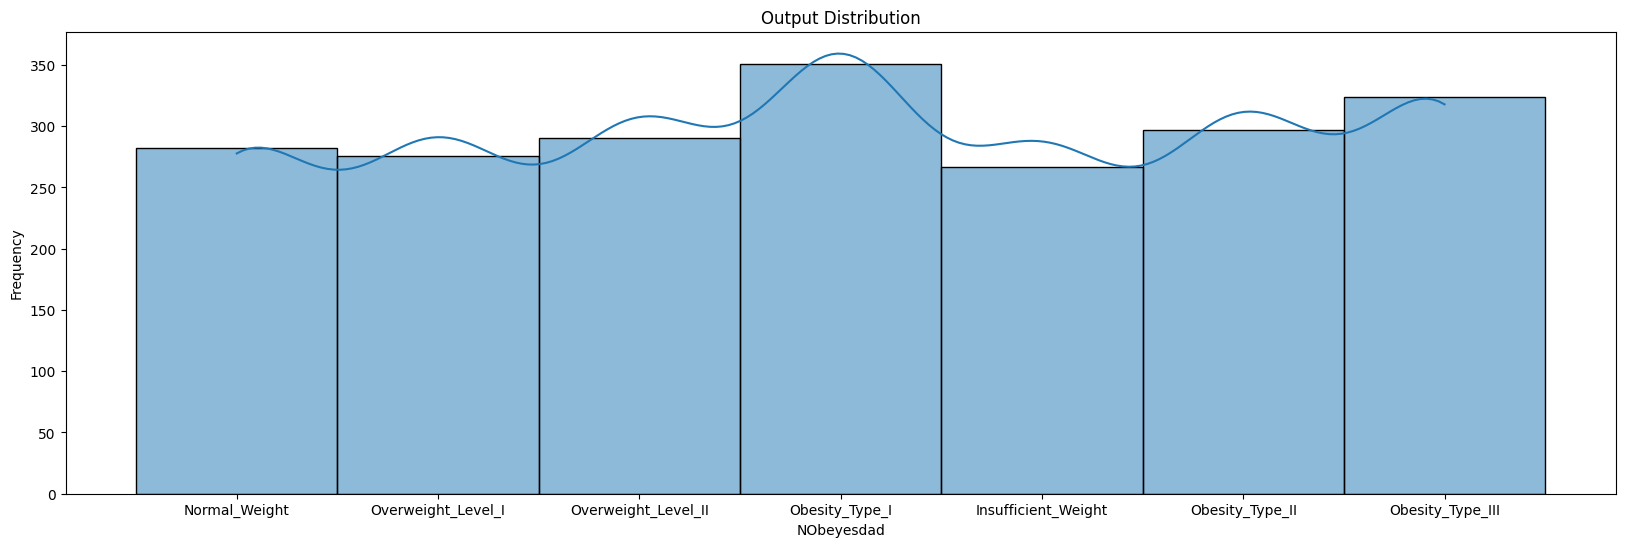

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Plot 1: Histogram of Age with KDE
plt.figure(figsize=(20, 6))
sns.histplot(df['NObeyesdad'], kde=True, bins=30)
plt.title('Output Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.show()


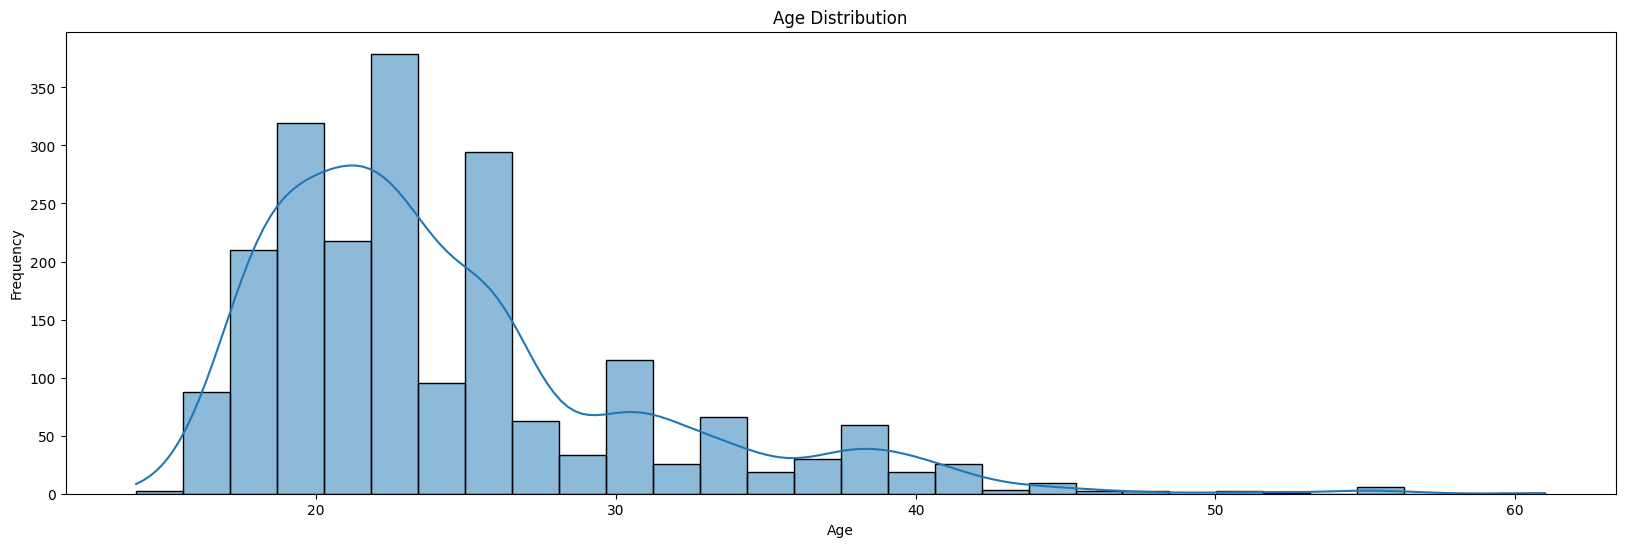

In [16]:

# Plot 2: Histogram of Heart Rate with KDE
plt.figure(figsize=(20, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

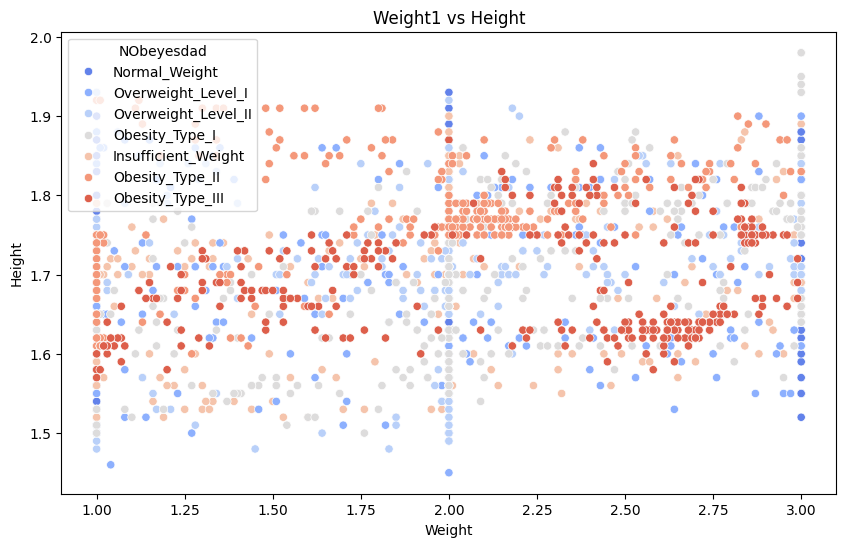

In [ ]:

# Use 'Weight' instead of 'Weight1' if 'Weight1' does not exist
plt.figure(figsize=(10, 6))
sns.scatterplot(data =df, x=df['Weight'], y=df['Height'], hue="NObeyesdad",palette="coolwarm")  # Scatter plot for two continuous variables
plt.title('Weight1 vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


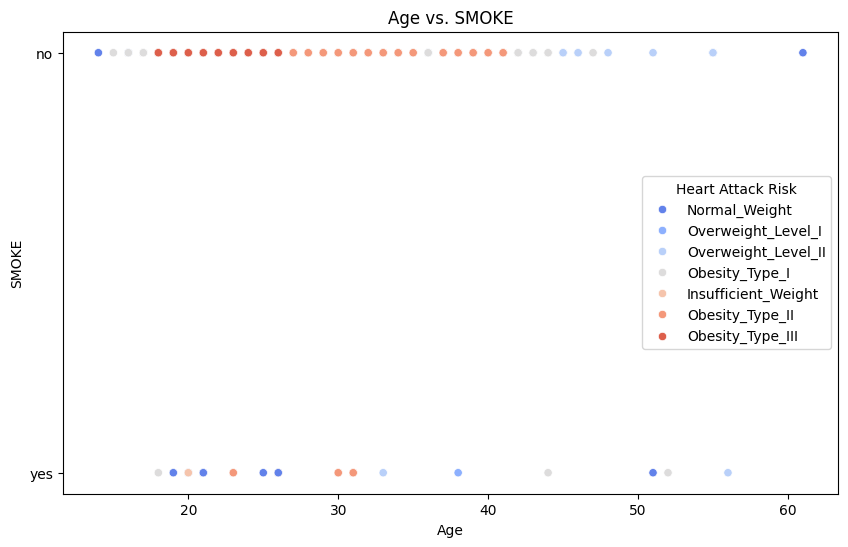

In [ ]:
# Plot 5: Scatterplot of Age vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="SMOKE", hue="NObeyesdad", palette='coolwarm')
plt.title('Age vs. SMOKE')
plt.xlabel('Age')
plt.ylabel('SMOKE')
plt.legend(title="Heart Attack Risk")
plt.show()

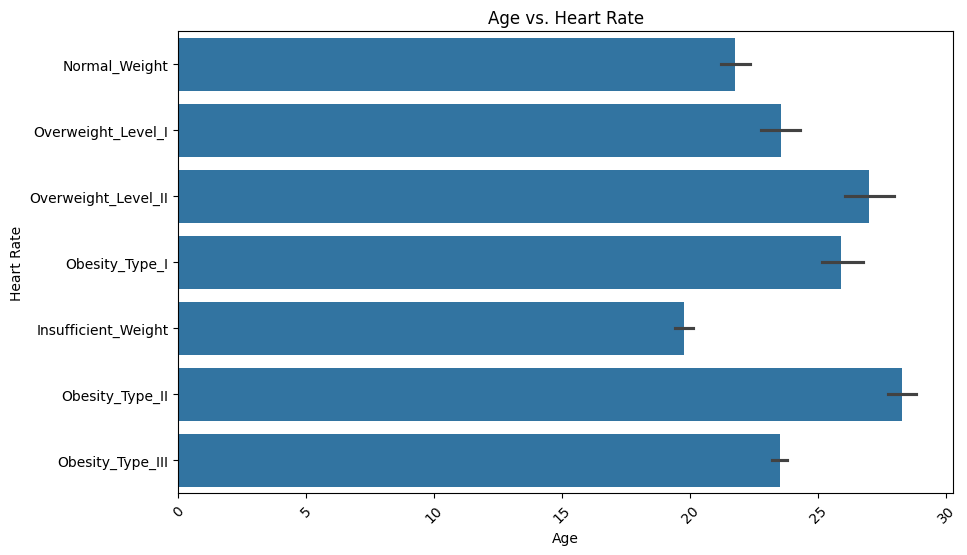

In [ ]:
# Plot 6: Bar plot of Age vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y="NObeyesdad", data=df)  # ci=None to avoid confidence intervals
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:

# Plot 7: Box plot of Heart Rate vs. Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Rate', y="Stress_Level", data=df)
plt.title('Heart Rate vs. Stress Level')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

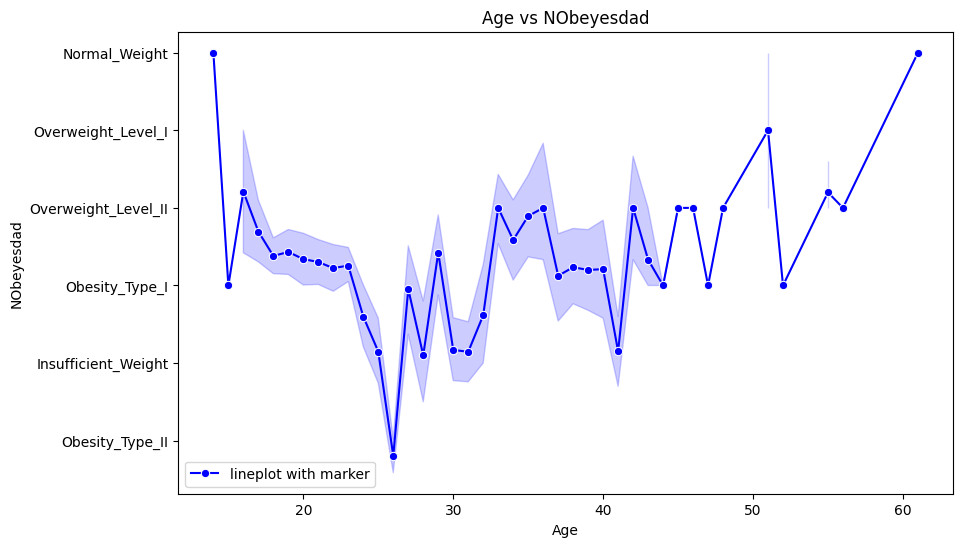

In [29]:
#Plot 8: lineplot with marker of Age vs.Heart_Attack_Risk
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Age",y="NObeyesdad", label="lineplot with marker", color="blue", marker="o" )
plt.title('Age vs NObeyesdad')
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.show()
# Count the occurrences of each unique value in the 'Heart_Attack_Risk' column
risk_counts = df['NObeyesdad'].value_counts()


In [ ]:

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon','yellow'])
plt.title('Heart Attack Risk Distribution')
plt.show()


In [ ]:
import pandas as pd



# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply the function to remove outliers
df_no_outliers_iqr = remove_outliers_iqr(df)


print("Original DataFrame:")
print(df)
print("\n\n\n\n")
print("\nDataFrame after removing outliers:")
print(df_no_outliers_iqr.head(20))
print("\n\n\n\n")
output_path = r"C:/Users/sabni/Documents/SKILL/hi3.csv"
df_no_outliers_iqr.to_csv(output_path, index=False)



In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for each numeric column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = zscore(df[col])
        print(f"Z-scores for column '{col}':")
        print(z_scores)


# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=1):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            z_scores = zscore(df[col])
            df = df[abs(z_scores) <= threshold]

    return df

# Apply the function to remove outliers
df_no_outliers_zscore = remove_outliers_zscore(df)

output_path = r"C:/Users/sabni/Documents/SKILL/hi4.csv"
df_no_outliers_zscore.to_csv(output_path, index=False)
print("\nDataFrame after removing outliers:")
print(df_no_outliers_zscore.head(20))

Chi-Square Scores:
                    Feature  Chi2 Score
8                Heart_Rate   13.173117
7                Resting_BP   10.379242
6         Cholesterol_Level    6.796015
12  Max_Heart_Rate_Achieved    5.940807
5              Hypertension    5.329900
11  Exercise_Induced_Angina    3.586085
4                  Diabetes    2.054292
9            Family_History    1.808392
10      Fasting_Blood_Sugar    1.702425
0                       Age    0.943490
2       Alcohol_Consumption    0.750080
1                   Smoking    0.704773
3                       BMI    0.050753
Selected Features (Chi2 Score > 5.0):
['Hypertension', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Max_Heart_Rate_Achieved']
Feature Importance:
                    Feature  Importance
3                       BMI    0.163437
6         Cholesterol_Level    0.162671
12  Max_Heart_Rate_Achieved    0.143749
7                Resting_BP    0.140107
0                       Age    0.137143
8                Heart_Rate   

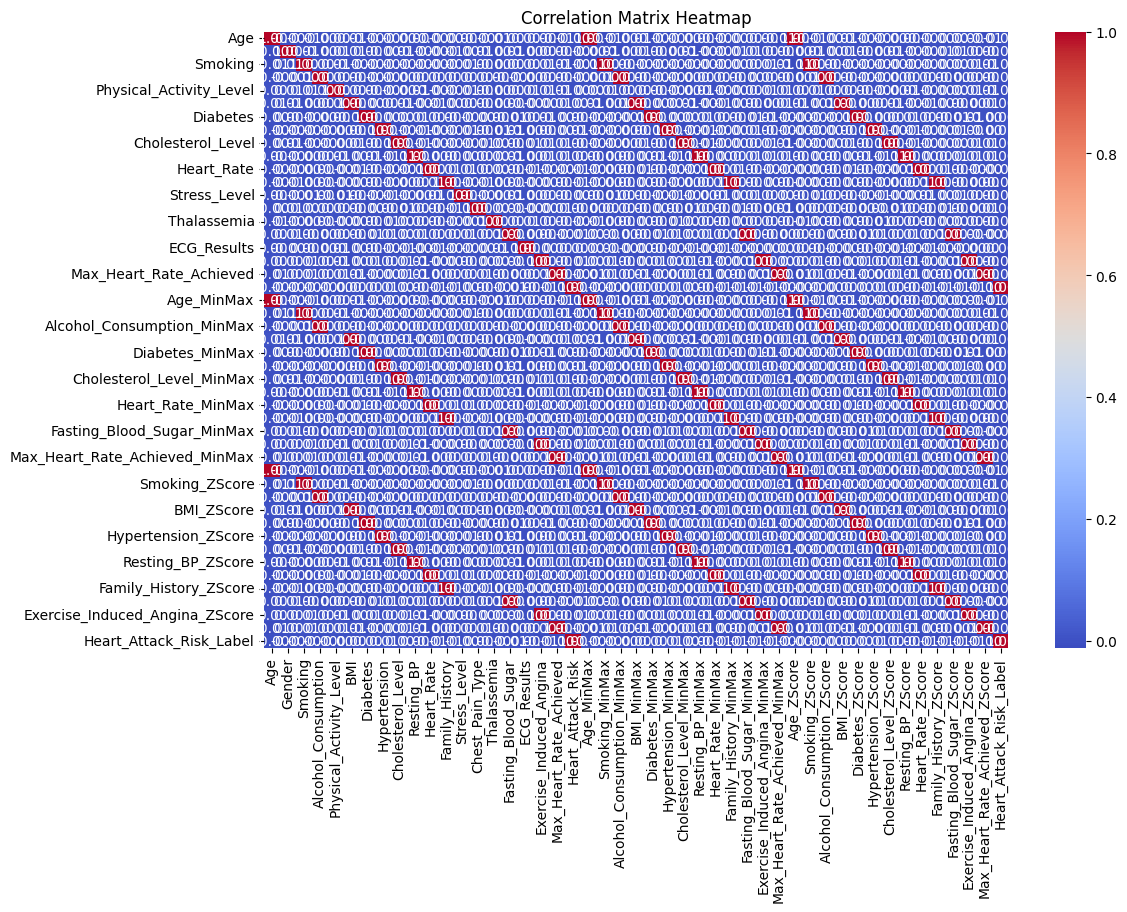

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Ensure all columns exist
numerical_cols = ['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes', 'Hypertension', 
                  'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History', 
                  'Fasting_Blood_Sugar', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']

numerical_cols = [col for col in numerical_cols if col in df.columns]  # Keep only existing numerical cols

# Encode the Target Variable (if it's categorical)
if 'Heart_Attack_Risk' in df.columns and df['Heart_Attack_Risk'].dtype == 'object':
    le = LabelEncoder()
    df['Heart_Attack_Risk_Label'] = le.fit_transform(df['Heart_Attack_Risk'])

# Univariate Selection (Chi-Square Test)
X = df[numerical_cols]  # Feature set
y = df['Heart_Attack_Risk_Label'] if 'Heart_Attack_Risk_Label' in df.columns else df['Heart_Attack_Risk']  # Target variable

chi2_selector = SelectKBest(score_func=chi2, k='all')
X_chi2 = X.fillna(0)  # Fill NaNs (Chi-Square requires no NaN values)
chi2_selector.fit(X_chi2, y)

chi2_scores = pd.DataFrame({'Feature': numerical_cols, 'Chi2 Score': chi2_selector.scores_})
print("Chi-Square Scores:")
print(chi2_scores.sort_values(by='Chi2 Score', ascending=False))

# Set a threshold for feature selection (e.g., 5.0)
threshold = 5.0  
selected_features = chi2_scores[chi2_scores['Chi2 Score'] > threshold]['Feature'].tolist()

print(f"Selected Features (Chi2 Score > {threshold}):")
print(selected_features)

# Filter features based on the threshold
X_selected = X[selected_features]

# Feature Importance using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X.fillna(0), y)  # Fill NaNs

feature_importance = pd.DataFrame({'Feature': numerical_cols, 'Importance': rf.feature_importances_})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Correlation Matrix with Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder


# Encode the target variable (Heart_Attack_Risk)
le = LabelEncoder()
df["Heart_Attack_Risk"] = le.fit_transform(df["Heart_Attack_Risk"])

# Identify categorical features and encode them
categorical_features = df.select_dtypes(include=["object"]).columns
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=["Heart_Attack_Risk"])
y = df["Heart_Attack_Risk"]

# Compute Mutual Information (Information Gain)
mi_scores = mutual_info_classif(X, y, discrete_features="auto")
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Compute ANOVA F-statistic
anova_scores, p_values = f_classif(X, y)
anova_results = pd.Series(anova_scores, index=X.columns).sort_values(ascending=False)

# Display top features by Information Gain and ANOVA
print("Top Features by Information Gain (Mutual Information):")
print(mi_results)
print("\nTop Features by ANOVA F-statistic:")
print(anova_results)
